<a href="https://colab.research.google.com/github/MathBird17/Optimization/blob/main/GoldenRain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el presente se comprobaran computacionalmente las propiedades vistas en clases del metodo Golden Section Search [1] haciendo uso del modulo Scipy. Para ello buscaremos el minimo de las siguientes tres funciones:
\begin{equation}
f_1(x)=(x-e^{-1})^2 +e^{-5(x-e^{-1})^2} \ \ : x\in [-1,3]
\end{equation}
\begin{equation}
f_2(x)=x^x \ \ : x\in [0,1]
\end{equation}
\begin{equation}
f_3(x)=x^{x^2} \ \ : x\in [0,1]
\end{equation}
Primero, vamos a visualizar las funciones:

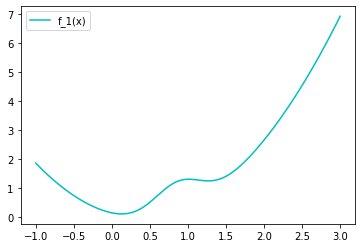

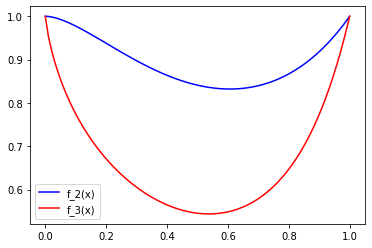

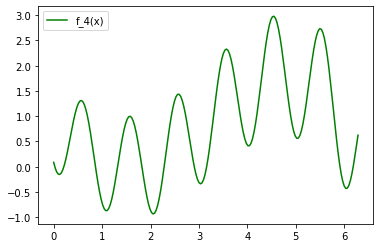

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f_1(x): 
    x0=np.exp(-1)
    return (x-x0)**2 + np.exp(-5*(x -  0.5 - x0)**2)
def f_2(x):
    k=x**2
    return x**k
def f_3(x):
    k=x**3 +x**2+x
    return x**k
x_1=np.linspace(-1,3,200)
x_2=np.linspace(0,1,100)
x_3=np.linspace(0,1,100)

plt.plot(x_1,f_1(x_1),color='c',label='f_1(x)')
plt.legend()
plt.show()
plt.plot(x_2,f_2(x_2),color='b',label='f_2(x)')
plt.plot(x_3,f_3(x_3),color='r',label='f_3(x)')
plt.legend()
plt.show()



Ahora procedemos a encontrar el minimo de las funciones con la funcion minimize_scalar del paquete scipy:

In [ ]:
from scipy import optimize
min1= optimize.minimize_scalar(f_1, (-1,3), method='golden')
min2= optimize.minimize_scalar(f_2, (0,1), method='golden')
min3= optimize.minimize_scalar(f_3, (0,1), method='golden')

print("minimo de f_1(x) en :"+ str(min1.x)+"\n minimo de f_2(x) en :"+ str(min2.x)+"\n minimo de f_3(x) en :"+ str(min3.x))

minimo de f_1(x) en :0.12812913545109078
 minimo de f_2(x) en :0.6065306545614861
 minimo de f_3(x) en :0.5374746197766294


A Continuacion vamos a graficar el error en cada iteracion y la velocidad de convergencia:

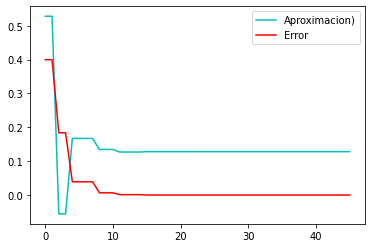

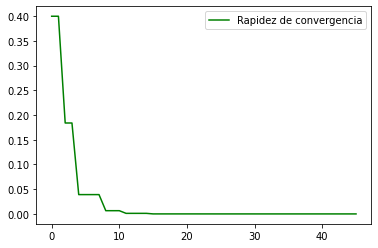

In [ ]:
min1.success=False 
iter = 1    # Numero de iteraciones
X=[]   # i-esimo Minimo calculado en la iteracion i
Ratio=[]  # Cociente entre el i-esimo minimo calculado y el siguiente
error=[]  #Error de la i-esima aproximacion
while min1.success == False:   # Se crea un ciclo que para cuando la aproximacion suple el error de maquina
  min1= optimize.minimize_scalar(f_1, (-1,3), method='golden', options={"maxiter": iter}) 
  X.append(min1.x)
  if iter>1:
    try:
      Ratio.append((X[iter-1]-0.12812913545109078)/(X[iter-2]-0.12812913545109078))
    except:
      iter+=1
  iter+=1
for i in range(len(X)): #Se calcula el error de la i-esima iteracion
  error.append(abs(X[i]-0.12812913545109078))
#Se realiza la grafica de la aproximacion, el error y la rapidez de convergencia con respecto al numero de iteraciones
plt.plot(range(len(X)),X,color='c',label='Aproximacion)')
plt.plot(range(len(X)),error,color='r',label='Error')
plt.legend()
plt.show()
plt.plot(range(len(X)),error,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show()

Como podemos apreciar apartir de la iteracion numero 10 la aproximacion tendria un error menor a 0.001, ademas, vemos como en las primeras aproximaciones la rapidez con la cual el minimo se aproxima es bastante alta y a medida que se estabiliza el cambio entre iteraciones se hace menor. De esta manera realizamos el mismo procedimiento para las funciones $f_2$ y $f_3$:

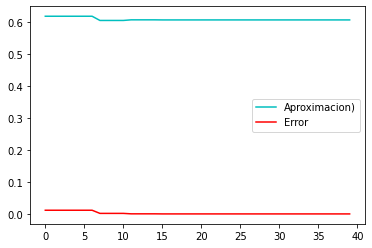

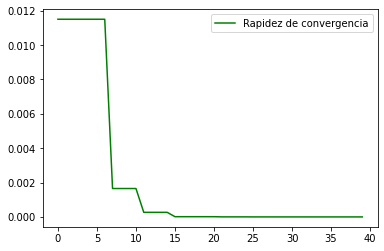

In [ ]:
min2.success=False
iter = 1
X=[]
Ratio=[]
error=[]
while min2.success == False:
  min2= optimize.minimize_scalar(f_2, (0,1), method='golden', options={"maxiter": iter})
  X.append(min2.x)
  if iter>1:
    try:
      Ratio.append((X[iter-1]-0.6065306545614861)/(X[iter-2]-0.6065306545614861))
    except:
      iter+=1
  iter+=1
for i in range(len(X)):
  error.append(abs(X[i]-0.6065306545614861))
plt.plot(range(len(X)),X,color='c',label='Aproximacion)')
plt.plot(range(len(X)),error,color='r',label='Error')
plt.legend()
plt.show()
plt.plot(range(len(X)),error,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show()

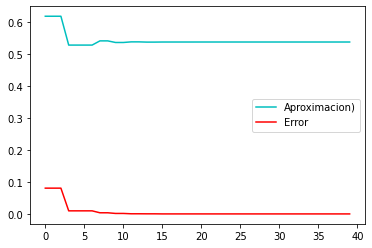

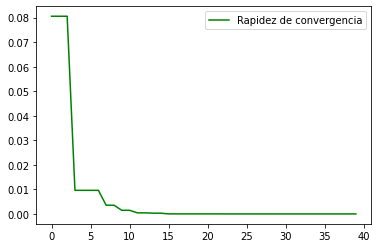

In [ ]:
min3.success=False
iter = 1
X=[]
Ratio=[]
error=[]
while min3.success == False:
  min3= optimize.minimize_scalar(f_3, (0,1), method='golden', options={"maxiter": iter})
  X.append(min3.x)
  if iter>1:
    try:
      Ratio.append((X[iter-1]-0.5374746197766294)/(X[iter-2]-0.5374746197766294))
    except:
      iter+=1
  iter+=1
for i in range(len(X)):
  error.append(abs(X[i]-0.5374746197766294))
plt.plot(range(len(X)),X,color='c',label='Aproximacion)')
plt.plot(range(len(X)),error,color='r',label='Error')
plt.legend()
plt.show()
plt.plot(range(len(X)),error,color='g',label='Rapidez de convergencia')
plt.legend()
plt.show()

Ahora vamos a ver una funcion para la cual el metodo falla segun el dominio que le pongamos, y esta es la funcion:
\begin{equation}
f_4(x)=(0.1x+1)cos(10x)+xsin(x) \ \ : x\in [0,2\pi]
\end{equation}
Si en la funcion minimize.scalar ponemos los dominios $[0,3\pi]$ , $[0,2\pi]$ y $[0,5]$ vemos que nos devuelve un minimo distinto apesar de que claramente en la grafica se observa que el minimo es el mismo en los tres intervalos. La razon del fallo es debido a que la funcion $f_4$ no es unimodal y esto causa que el algoritmo quede "atrapado" en unos intervalos que no incluyen al minimo de todo el intervalo. Para solucionarlo reducimos el intervalo a uno en el cual la funcion si sea unimodal.

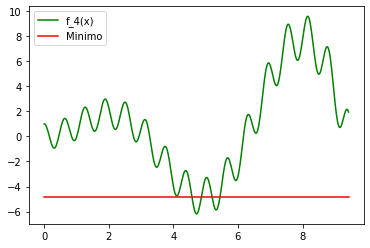

-17.07027483395163


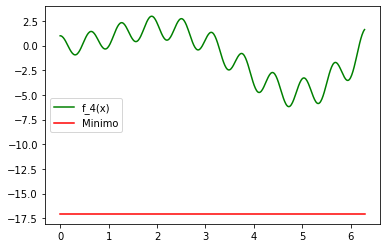

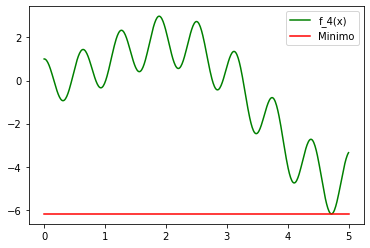

In [ ]:
def f_4(x):
    k=(0.1*x+1)*np.cos(10*x)+x*np.sin(x)
    return k

# Con dominio [0,3pi]
x_4=np.linspace(0,3*np.pi,500)
min4= optimize.minimize_scalar(f_4, (0,3*np.pi), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()

# Con dominio [0,2pi]
x_4=np.linspace(0,2*np.pi,500)
min4= optimize.minimize_scalar(f_4, (0,2*np.pi), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
print(min4.fun)
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()

# Con dominio [0,5]
x_4=np.linspace(0,5,500)
min4= optimize.minimize_scalar(f_4, (0,5), method='golden')
plt.plot(x_4,f_4(x_4),color='g',label='f_4(x)')
plt.plot(x_4,min4.fun*np.ones(500),color='r',label='Minimo')
plt.legend()
plt.show()
